# K-Means

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Veri Seti

In [6]:
df = pd.read_csv("./USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


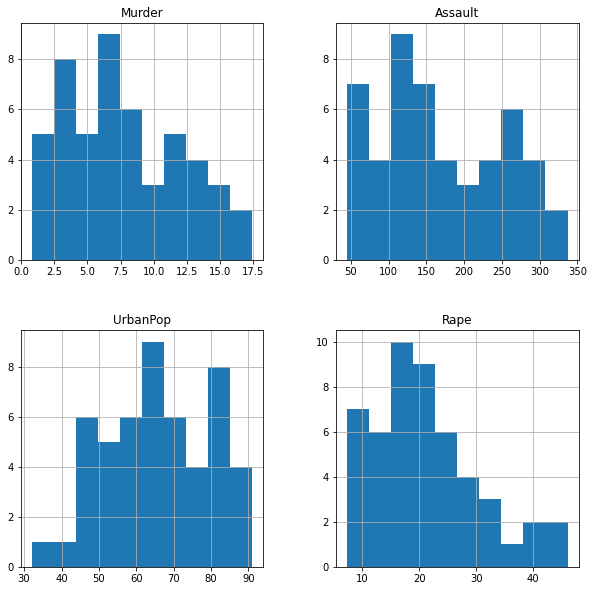

In [12]:
df.hist(figsize=(10,10));

In [13]:
kmeans = KMeans(n_clusters= 4)

In [17]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=None, tol=0.0001,
       verbose=0)

In [16]:
from sklearn import set_config
set_config(print_changed_only=False)

In [18]:
k_fit = kmeans.fit(df)

In [19]:
k_fit.n_clusters

4

In [20]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [22]:
k_fit.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

In [23]:
# Kümelerin Görselleştirilmesi

In [24]:
k_means = KMeans(n_clusters = 2).fit(df)

In [25]:
kumeler = k_means.labels_

In [26]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

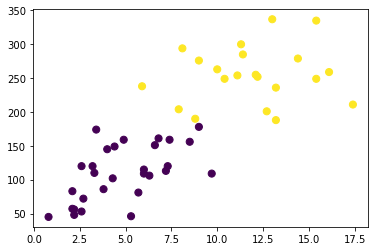

In [29]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c= kumeler, s= 50, cmap ="viridis" );

In [31]:
merkezler = k_means.cluster_centers_

In [32]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

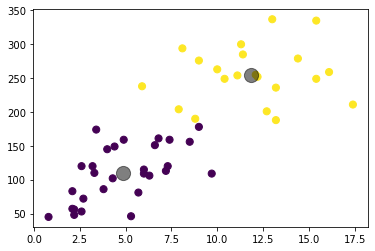

In [36]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c= kumeler, s= 50, cmap ="viridis" );
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5);

## Optimum Küme Sayısının Belirlenmesi

### Elbow Yöntemi

In [37]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [38]:
ssd = [] #uzakllık farkalrının karelerinin toplamı

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)
    

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'optimum küme sayısı için Elbow Yöntemi')

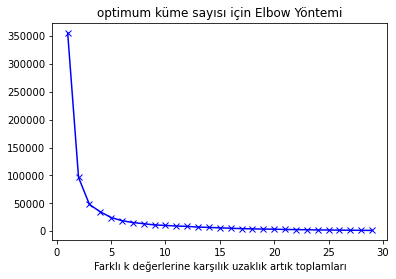

In [39]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı k değerlerine karşılık uzaklık artık toplamları")
plt.title("optimum küme sayısı için Elbow Yöntemi")

In [42]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [43]:
from yellowbrick.cluster import KElbowVisualizer

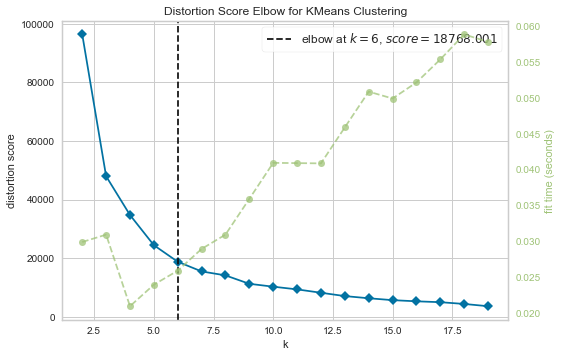

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans,k= (2,20) )
visu.fit(df)
visu.poof()

In [45]:
# final modeli 
kmeans = KMeans(n_clusters=4).fit(df)

In [46]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=None, tol=0.0001,
       verbose=0)

In [47]:
kumeler = kmeans.labels_

In [48]:
pd.DataFrame({"Eyaletler":df.index,"kumeler":kumeler})

,Eyaletler,kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [49]:
df["Kume_No"] = kumeler

In [50]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,2


# Hiyerarşik Kümeleme

In [51]:
from scipy.cluster.hierarchy import linkage

In [53]:
hc_complete = linkage(df,"complete")
hc_average = linkage(df,"average")

In [57]:
from scipy.cluster.hierarchy import dendrogram

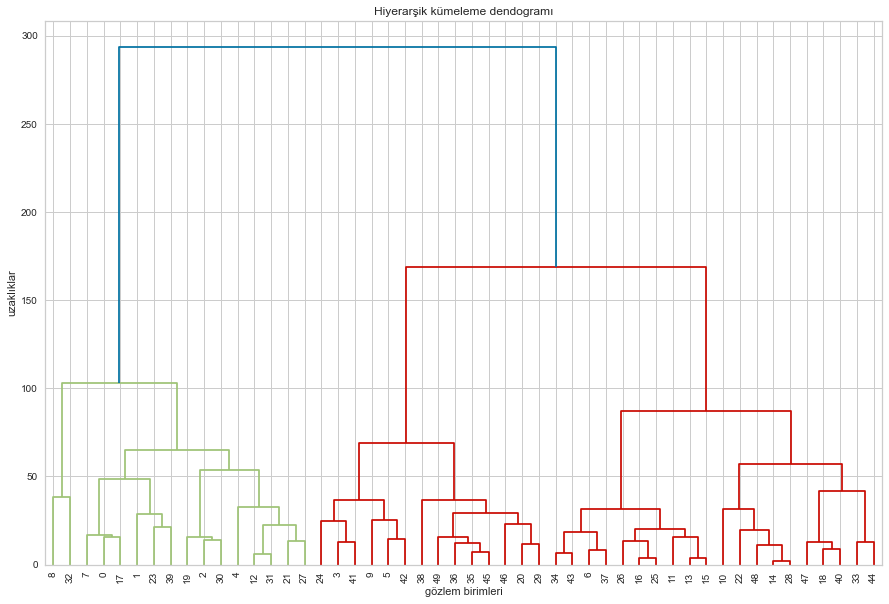

In [60]:
plt.figure(figsize = (15,10))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("gözlem birimleri")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,
         leaf_font_size = 10);

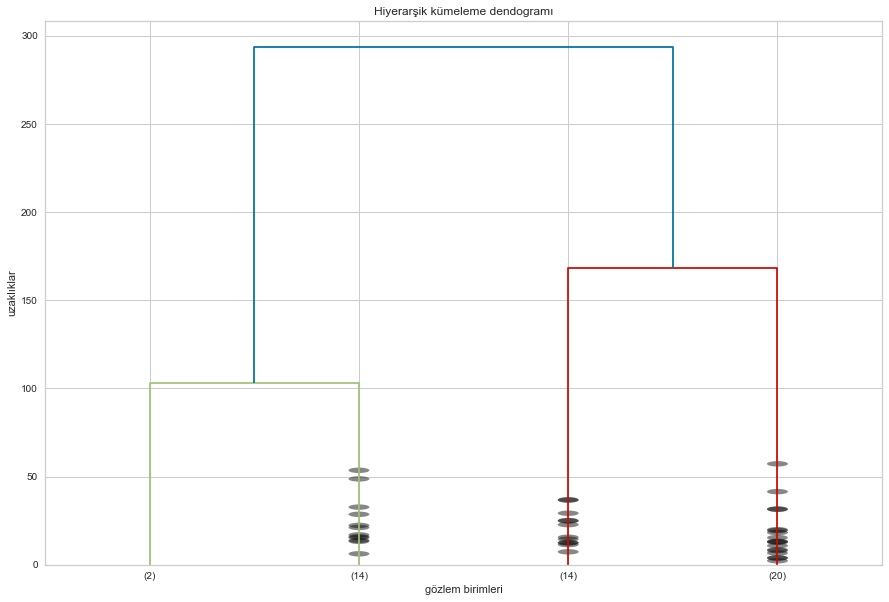

In [62]:
plt.figure(figsize = (15,10))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("gözlem birimleri")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",   #kaç gözlem
           p=4,                    #gözlem sayısı
           show_contracted=True,   #seçilen kümelerde kaç gözlem var
         leaf_font_size = 10);

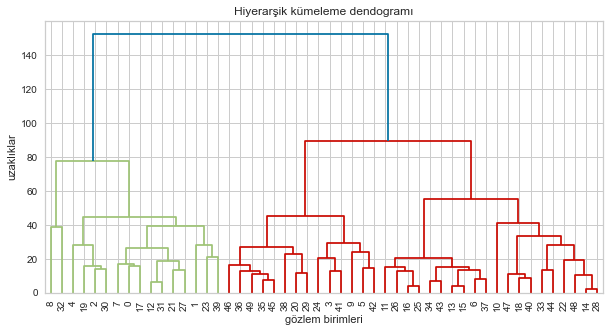

In [63]:
plt.figure(figsize = (10,5))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("gözlem birimleri")
plt.ylabel("uzaklıklar")
dendrogram(hc_average,
         leaf_font_size = 10);

# Temel Bileşen Analizi

In [64]:
df = pd.read_csv("./Hitters.csv")
df.dropna(inplace=True)  #eksik gözlemleri siler
df = df._get_numeric_data()  #sadece sayısal değişkenleri seçer
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
df = StandardScaler().fit_transform(df)

In [68]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [72]:
pca_fit

array([[ 7.68482432e-02,  1.65352465e+00],
       [ 3.37126792e-01, -2.32055981e+00],
       [ 3.40836188e+00,  7.55756506e-01],
       [-2.64222127e+00, -3.61486414e-01],
       [ 1.07168072e+00, -1.51167360e+00],
       [-4.14334694e+00,  1.52761501e+00],
       [-3.66187880e+00,  7.26482752e-01],
       [-3.46358326e+00, -1.11932250e-01],
       [ 3.95881864e+00,  2.16536132e+00],
       [ 2.97619746e+00, -2.18509076e+00],
       [-2.00435156e+00,  1.62310751e+00],
       [-8.22584224e-01, -5.87547914e-01],
       [-2.24564747e+00,  1.81903669e+00],
       [-1.12980749e+00,  2.57831292e+00],
       [ 5.74490571e+00,  2.22535369e-01],
       [-3.74756191e+00,  1.33933904e+00],
       [-3.28875794e+00,  2.29328755e+00],
       [-1.85723415e+00, -1.43268195e+00],
       [-2.29170256e+00, -9.25891185e-01],
       [ 2.54702025e-01, -1.12943118e+00],
       [ 5.83585565e+00, -2.23890882e-01],
       [ 7.95632970e-01, -1.52534619e+00],
       [-1.83824827e+00,  1.52283175e+00],
       [ 1.

In [73]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bileşen","ikinci_bileşen"])

In [74]:
bilesen_df

,birinci_bileşen,ikinci_bileşen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [76]:
pca.explained_variance_ratio_    #değişkenler veri setini ne kadar açıklayabilmiş

array([0.45245466, 0.24246801])

In [78]:
pca.components_[1]   #değişkene erişme

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

Text(0, 0.5, 'Kümülatif varyans oranı')

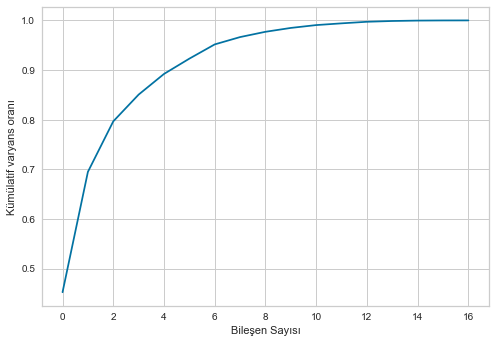

In [81]:
#optimum bileşen sayısı
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_ ))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif varyans oranı")

In [82]:
# final modeli 

In [83]:
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [85]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])